# APIWeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []
city_name =[]
lat = []
lng = []
max_temp =[]
humidity = []
clouds = []
wind_speed =[]
country = []
date =[]

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out city name, latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_name.append(city_weather['name'])
        lat.append(city_weather['coord']['lat'])
        lng.append(city_weather['coord']['lon'])
        max_temp.append(city_weather['main']['temp_max'])
        humidity.append(city_weather['main']['humidity'])
        clouds.append(city_weather['clouds']['all'])
        wind_speed.append(city_weather['wind']['speed'])
        country.append(city_weather['sys']['country'])
        date.append(city_weather['dt'])

        # Append the City information into city_data list
        city_data_dic ={"City": city_name, 
                          "Lat": lat, 
                          "Lng": lng, 
                          "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": clouds,
                          "Wind Speed": wind_speed,
                          "Country": country,
                          "Date": date}

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olopa
Processing Record 2 of Set 1 | yenagoa
Processing Record 3 of Set 1 | adrar
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | hambantota
Processing Record 10 of Set 1 | bafra
Processing Record 11 of Set 1 | wamba
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | hofn
Processing Record 15 of Set 1 | lazaro cardenas
Processing Record 16 of Set 1 | ponta do sol
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | rudnichnyy
Processing Record 19 of Set 1 | upington
Processing Record 20 of Set 1 | barahona
Processing Record 21 of Set 1 | castro
Processing Record 22 of Se

In [4]:
city_data_df = pd.DataFrame(city_data_dic)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Olopa,14.6833,-89.3500,14.86,98,79,1.54,GT,1670236640
1,Yenagoa,4.9247,6.2642,34.35,48,62,0.60,NG,1670236640
2,Adrar,20.5022,-10.0711,28.02,18,0,1.10,MR,1670236641
3,Hermanus,-34.4187,19.2345,22.11,62,35,4.68,ZA,1670236578
4,Tasiilaq,65.6145,-37.6368,-1.91,76,96,2.43,GL,1670236641
5,Rikitea,-23.1203,-134.9692,23.71,82,81,2.72,PF,1670236459
6,Hambantota,6.1241,81.1185,28.19,89,40,1.54,LK,1670236642
7,Bafra,41.5678,35.9069,14.84,79,98,3.88,TR,1670236642
8,Wamba,8.9333,8.6000,36.79,9,89,3.04,NG,1670236643
9,Albany,42.6001,-73.9662,-0.43,81,25,1.48,US,1670236522


In [5]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [6]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Olopa,14.6833,-89.3500,14.86,98,79,1.54,GT,1670236640
1,Yenagoa,4.9247,6.2642,34.35,48,62,0.60,NG,1670236640
2,Adrar,20.5022,-10.0711,28.02,18,0,1.10,MR,1670236641
3,Hermanus,-34.4187,19.2345,22.11,62,35,4.68,ZA,1670236578
4,Tasiilaq,65.6145,-37.6368,-1.91,76,96,2.43,GL,1670236641


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

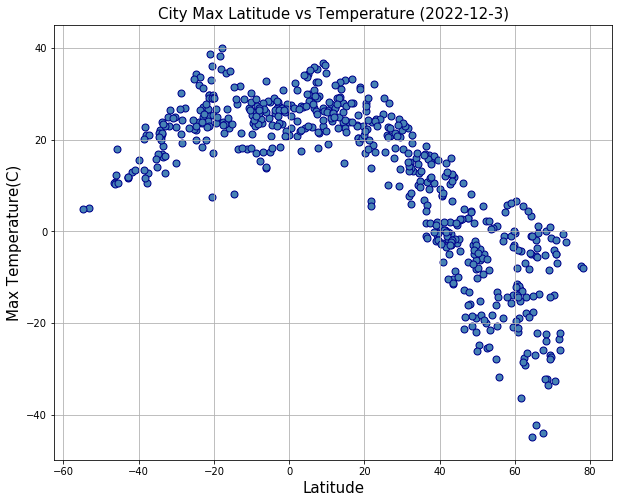

In [7]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.figure(figsize=(10,8))
fontsize = 15
plt.xlabel('Latitude', fontdict={'fontsize': fontsize})
plt.ylabel('Max Temperature(C)', fontdict={'fontsize': fontsize})
plt.title('City Max Latitude vs Temperature (2022-12-3)', fontdict={'fontsize': fontsize})
plt.scatter(x_axis, y_axis)
plt.grid()
plt.scatter(x_axis, y_axis, s=49, c="steelblue", marker="o", edgecolors="darkblue")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

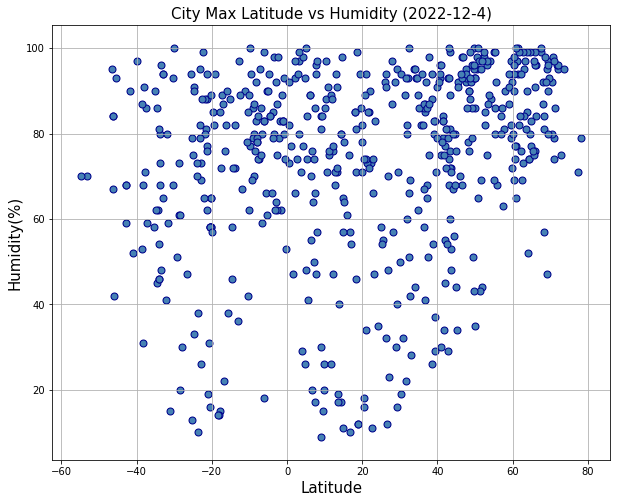

In [8]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']

# Incorporate the other graph properties
plt.figure(figsize=(10,8))
fontsize = 15
plt.xlabel('Latitude', fontdict={'fontsize': fontsize})
plt.ylabel('Humidity(%)', fontdict={'fontsize': fontsize})
plt.title('City Max Latitude vs Humidity (2022-12-4)', fontdict={'fontsize': fontsize})
plt.scatter(x_axis, y_axis)
plt.grid()
plt.scatter(x_axis, y_axis, s=49, c="steelblue", marker="o", edgecolors="darkblue")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

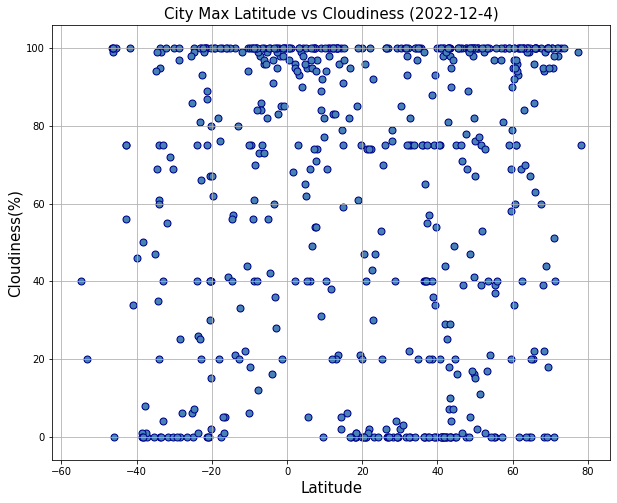

In [9]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.figure(figsize=(10,8))
fontsize = 15
plt.xlabel('Latitude', fontdict={'fontsize': fontsize})
plt.ylabel('Cloudiness(%)', fontdict={'fontsize': fontsize})
plt.title('City Max Latitude vs Cloudiness (2022-12-4)', fontdict={'fontsize': fontsize})
plt.scatter(x_axis, y_axis)
plt.grid()
plt.scatter(x_axis, y_axis, s=49, c="steelblue", marker="o", edgecolors="darkblue")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

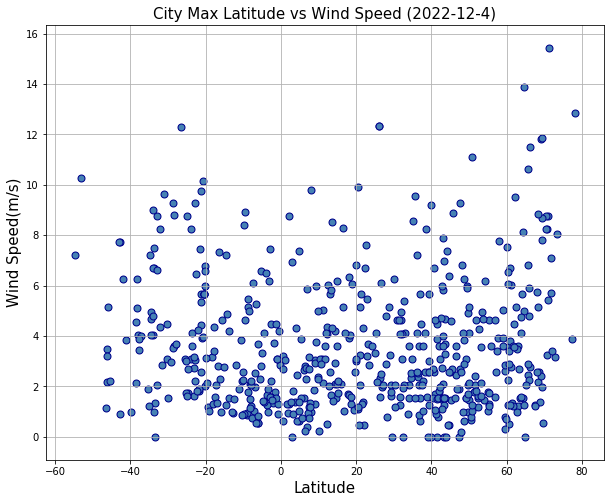

In [10]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.figure(figsize=(10,8))
fontsize = 15
plt.xlabel('Latitude', fontdict={'fontsize': fontsize})
plt.ylabel('Wind Speed(m/s)', fontdict={'fontsize': fontsize})
plt.title('City Max Latitude vs Wind Speed (2022-12-4)', fontdict={'fontsize': fontsize})
plt.scatter(x_axis, y_axis)
plt.grid()
plt.scatter(x_axis, y_axis, s=49, c="steelblue", marker="o", edgecolors="darkblue")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

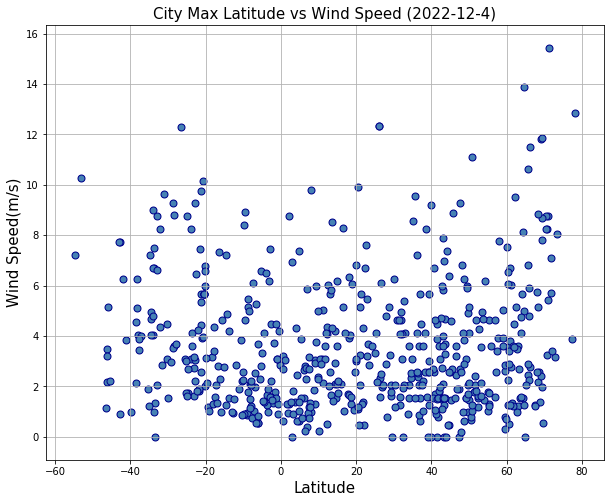

In [11]:


# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.figure(figsize=(10,8))
fontsize = 15
plt.xlabel('Latitude', fontdict={'fontsize': fontsize})
plt.ylabel('Wind Speed(m/s)', fontdict={'fontsize': fontsize})
plt.title('City Max Latitude vs Wind Speed (2022-12-4)', fontdict={'fontsize': fontsize})
plt.scatter(x_axis, y_axis)
plt.grid()
plt.scatter(x_axis, y_axis, s=49, c="steelblue", marker="o", edgecolors="darkblue")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship

In [12]:
# Define a function to create Linear Regression plots
slope, intercept, r_value, p_value, std_err = linregress(lat, max_temp)
result = linregress(lat, max_temp)
print(result)

LinregressResult(slope=-0.39662426259053957, intercept=19.277953988910994, rvalue=-0.7452869010553335, pvalue=1.3524585057247236e-102, stderr=0.014848985723743177)


In [13]:
type(intercept)

numpy.float64

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Olopa,14.6833,-89.3500,14.86,98,79,1.54,GT,1670236640
1,Yenagoa,4.9247,6.2642,34.35,48,62,0.60,NG,1670236640
2,Adrar,20.5022,-10.0711,28.02,18,0,1.10,MR,1670236641
4,Tasiilaq,65.6145,-37.6368,-1.91,76,96,2.43,GL,1670236641
6,Hambantota,6.1241,81.1185,28.19,89,40,1.54,LK,1670236642


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,Hermanus,-34.4187,19.2345,22.11,62,35,4.68,ZA,1670236578
5,Rikitea,-23.1203,-134.9692,23.71,82,81,2.72,PF,1670236459
10,Busselton,-33.6500,115.3333,18.65,68,95,7.51,AU,1670236643
14,New Norfolk,-42.7826,147.0587,11.72,59,56,0.89,AU,1670236645
16,Upington,-28.4478,21.2561,24.21,20,0,3.60,ZA,1670236646


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8653532945628578


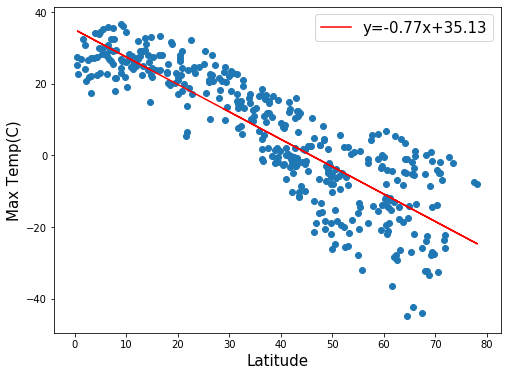

In [16]:
# Linear regression on Northern Hemisphere

# Build scatter plot for latitude vs. temperature
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']

# Create linear regression model 
slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
res = linregress(x_axis, y_axis)
print(f"The r-value is {r_value}")

line = slope*x_axis + intercept

# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8,6))
fontsize = 15
plt.xlabel('Latitude', fontdict={'fontsize': fontsize})
plt.ylabel('Max Temp(C)', fontdict={'fontsize': fontsize})
plt.plot(x_axis, line, 'r', label='y={:.2f}x+{:.2f}'.format(res.slope,res.intercept))
plt.legend(loc='upper right',fontsize=15)
plt.scatter(x_axis, y_axis)
plt.show()

The r-value is 0.4738872643791924


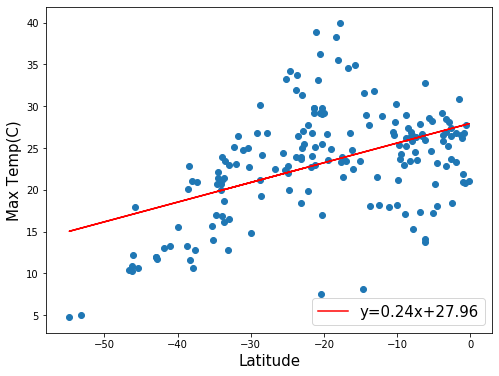

In [17]:
# Linear regression on Southern Hemisphere

# Build scatter plot for latitude vs. temperature
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']

# Create linear regression model 
slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
res = linregress(x_axis, y_axis)
print(f"The r-value is {r_value}")

line = slope*x_axis + intercept

# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8,6))
fontsize = 15
plt.xlabel('Latitude', fontdict={'fontsize': fontsize})
plt.ylabel('Max Temp(C)', fontdict={'fontsize': fontsize})
plt.plot(x_axis, line, 'r', label='y={:.2f}x+{:.2f}'.format(res.slope,res.intercept))
plt.legend(loc='lower right',fontsize=15)
plt.scatter(x_axis, y_axis)
plt.show()

**Discussion about the linear relationship:** From the generated data we learnted that in Northern Hemisphere, when the latitude increase 1 unit, the max temperature could decrease 0.77 unit. While in Southern Hemiphere when the absolute value of the latitude increate 1 unit, the max temperature decrease 0.24 unit, in which their linear relationship is not as strong as they are in Northern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.33674503030739583


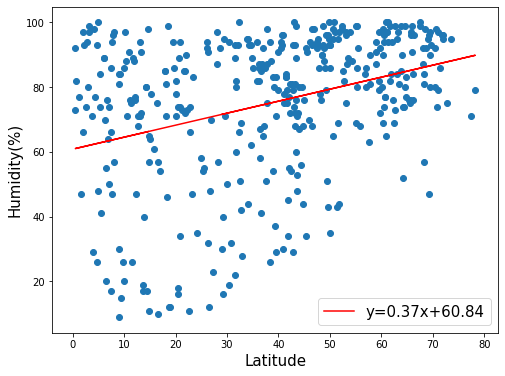

In [18]:
# Linear regression on Northern Hemisphere

# Build scatter plot for latitude vs. temperature
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']

# Create linear regression model 
slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
res = linregress(x_axis, y_axis)
print(f"The r-value is {r_value}")

line = slope*x_axis + intercept

# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8,6))
fontsize = 15
plt.xlabel('Latitude', fontdict={'fontsize': fontsize})
plt.ylabel('Humidity(%)', fontdict={'fontsize': fontsize})
plt.plot(x_axis, line, 'r', label='y={:.2f}x+{:.2f}'.format(res.slope,res.intercept))
plt.legend(loc='lower right',fontsize=15)
plt.scatter(x_axis, y_axis)
plt.show()

The r-value is 0.16902377901289095


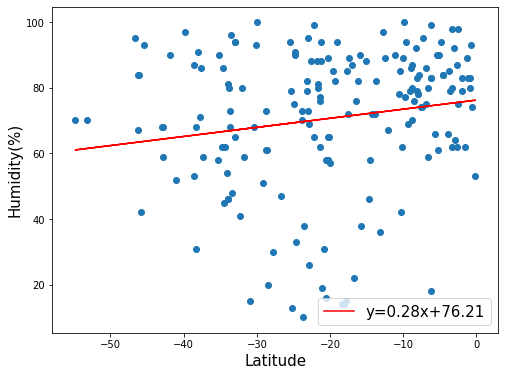

In [19]:
# Linear regression on Southern Hemisphere

# Build scatter plot for latitude vs. temperature
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']

# Create linear regression model 
slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
res = linregress(x_axis, y_axis)
print(f"The r-value is {r_value}")

line = slope*x_axis + intercept

# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8,6))
fontsize = 15
plt.xlabel('Latitude', fontdict={'fontsize': fontsize})
plt.ylabel('Humidity(%)', fontdict={'fontsize': fontsize})
plt.plot(x_axis, line, 'r', label='y={:.2f}x+{:.2f}'.format(res.slope,res.intercept))
plt.legend(loc='lower right',fontsize=15)
plt.scatter(x_axis, y_axis)
plt.show()

**Discussion about the linear relationship:** From the generated data we learnted that in Northern Hemisphere, when the latitude increase 1 unit, the humidity could increase about 0.37 unit. While in Southern Hemiphere the two variables has the relationship. Data shows the r-value when in Southern Hemisphere is 0.28. The correlation between the latitude and the humidity is not as strong as the correlation between the latitude and the max temperature. 

The r-value is 0.032953193106904324


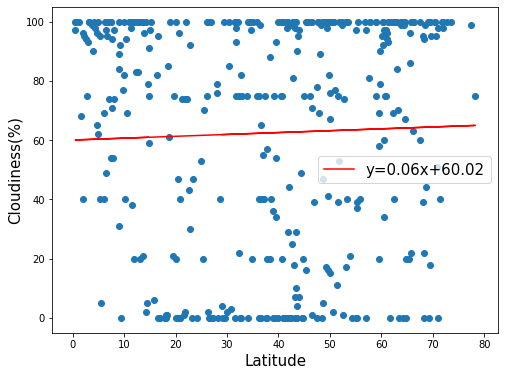

In [20]:
# Linear regression on Northern Hemisphere

# Build scatter plot for latitude vs. temperature
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']

# Create linear regression model 
slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
res = linregress(x_axis, y_axis)
print(f"The r-value is {r_value}")

line = slope*x_axis + intercept

# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8,6))
fontsize = 15
plt.xlabel('Latitude', fontdict={'fontsize': fontsize})
plt.ylabel('Cloudiness(%)', fontdict={'fontsize': fontsize})
plt.plot(x_axis, line, 'r', label='y={:.2f}x+{:.2f}'.format(res.slope,res.intercept))
plt.legend(loc='center right',fontsize=15)
plt.scatter(x_axis, y_axis)
plt.show()

The r-value is 0.2938029477138619


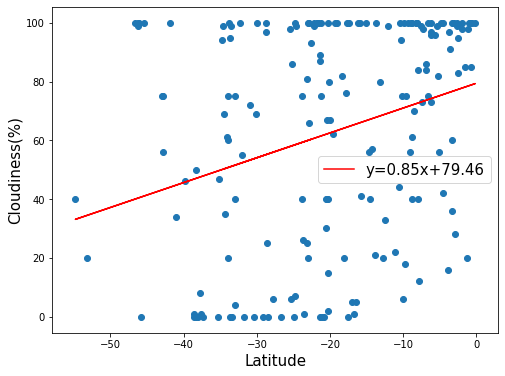

In [21]:
# Linear regression on Southern Hemisphere

# Build scatter plot for latitude vs. temperature
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']

# Create linear regression model 
slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
res = linregress(x_axis, y_axis)
print(f"The r-value is {r_value}")

line = slope*x_axis + intercept

# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8,6))
fontsize = 15
plt.xlabel('Latitude', fontdict={'fontsize': fontsize})
plt.ylabel('Cloudiness(%)', fontdict={'fontsize': fontsize})
plt.plot(x_axis, line, 'r', label='y={:.2f}x+{:.2f}'.format(res.slope,res.intercept))
plt.legend(loc='center right',fontsize=15)
plt.scatter(x_axis, y_axis)
plt.show()

**Discussion about the linear relationship:** From the scatter plot and the linear regression line from both Northern and Southern Hemisphere, we learned that the cloudness is not strongly associated with the latitude, expecially in Northern Hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.19734301419626227


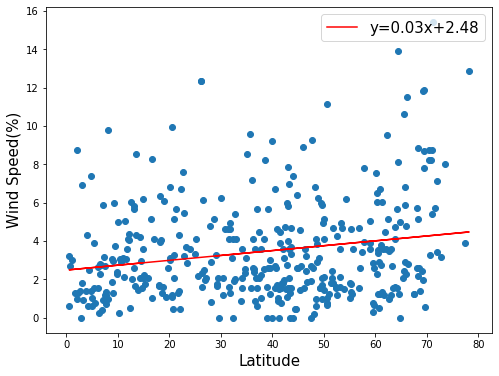

In [22]:
# Linear regression on Northern Hemisphere

# Build scatter plot for latitude vs. temperature
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']

# Create linear regression model 
slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
res = linregress(x_axis, y_axis)
print(f"The r-value is {r_value}")

line = slope*x_axis + intercept

# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8,6))
fontsize = 15
plt.xlabel('Latitude', fontdict={'fontsize': fontsize})
plt.ylabel('Wind Speed(%)', fontdict={'fontsize': fontsize})
plt.plot(x_axis, line, 'r', label='y={:.2f}x+{:.2f}'.format(res.slope,res.intercept))
plt.legend(loc='upper right',fontsize=15)
plt.scatter(x_axis, y_axis)
plt.show()

The r-value is -0.3004524426341956


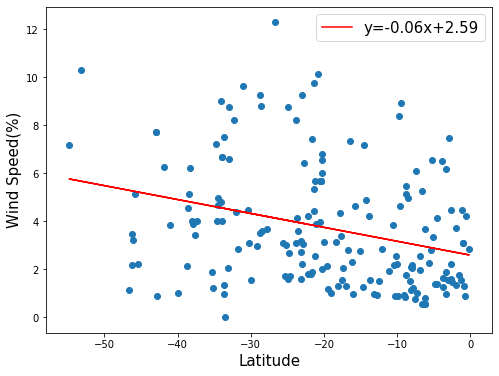

In [23]:
# Linear regression on Southern Hemisphere

# Build scatter plot for latitude vs. temperature
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']

# Create linear regression model 
slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
res = linregress(x_axis, y_axis)
print(f"The r-value is {r_value}")

line = slope*x_axis + intercept

# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8,6))
fontsize = 15
plt.xlabel('Latitude', fontdict={'fontsize': fontsize})
plt.ylabel('Wind Speed(%)', fontdict={'fontsize': fontsize})
plt.plot(x_axis, line, 'r', label='y={:.2f}x+{:.2f}'.format(res.slope,res.intercept))
plt.legend(loc='upper right',fontsize=15)
plt.scatter(x_axis, y_axis)
plt.show()

**Discussion about the linear relationship:** From the scatter plot and the linear regression line from both Northern and Southern Hemisphere, we learned that the wind speed is basicallu not affected by the latitude. 